# Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [11]:
airline_data = pd.read_excel('new data.xlsx')
airline_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Initial Understanding of Data

In [12]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [13]:
airline_data.shape

(3999, 12)

In [14]:
airline_data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [15]:
airline_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# Data Prepration

In [17]:
airline_data = airline_data.drop('ID#',axis = 1)
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# Clustering

# 1. Hierarchical Clustering

## Normalising the Data

In [18]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [19]:
df_norm = norm_func(airline_data)
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


### Creating a Dendogram

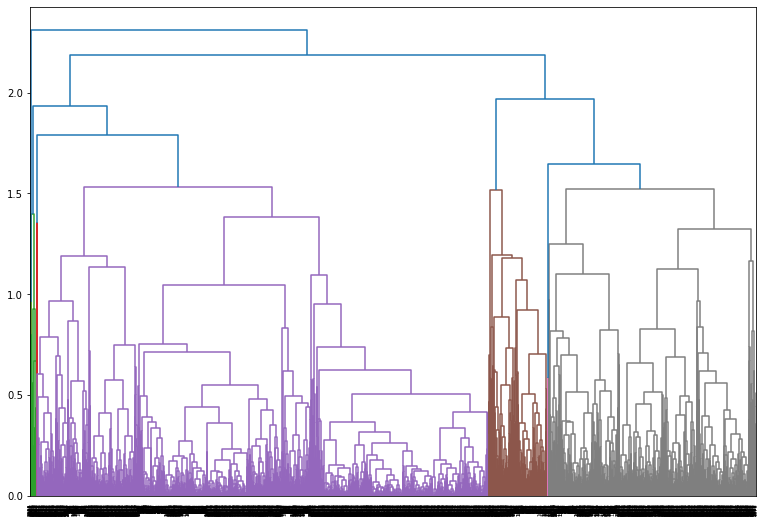

In [24]:
plt.figure(figsize=(13, 9)) 
Dendogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

## Creating Clusters

In [25]:
hc_cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc = hc_cluster.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [26]:
Clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,3
...,...
3994,0
3995,0
3996,0
3997,4


In [27]:
airline_data['Clusters'] = Clusters
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [28]:
airline_data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


### Inferences:
#### 1) Average Balance of people in cluster 0 is 79848.
#### 2) Average Balance of people in cluster 1 is 43313.
#### 3) Average Balance of people in cluster 2 is 106221.
#### 4) Average Balance of people in cluster 3 is 127475.
#### 5) Average Balance of people in cluster 4 is 30013.

## Plotting of clusters

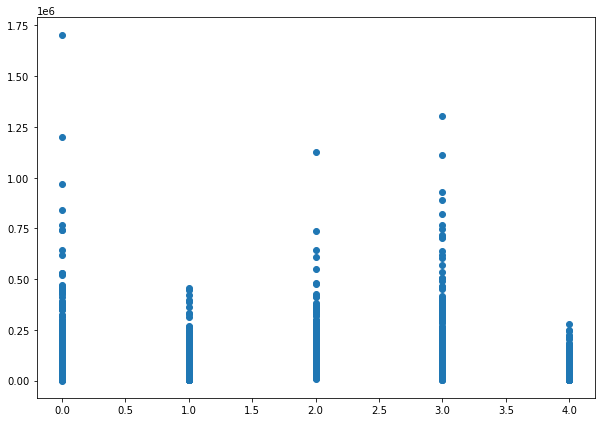

In [33]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline_data['Clusters'],airline_data['Balance']) 
plt.show()

In [35]:
airline_data[airline_data['Clusters'] == 0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0
17,13958,0,1,1,1,4291,5,0,0,6905,1,0
18,91473,0,3,1,1,27408,17,0,0,6903,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0


In [36]:
airline_data[airline_data['Clusters'] == 1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3786,27669,0,1,1,1,3219,7,0,0,3413,0,1
3790,73159,0,1,1,1,358,4,358,4,3237,0,1
3793,38827,0,1,1,1,0,0,0,0,2993,0,1
3794,29919,0,1,1,1,1225,3,0,0,2949,0,1


In [37]:
airline_data[airline_data['Clusters'] == 2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
6,84914,0,3,1,1,27482,25,0,0,6994,0,2
10,40091,0,2,1,1,7278,10,0,0,6959,0,2
12,43382,0,2,1,1,11150,20,0,0,6924,0,2
30,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,276571,0,4,1,1,42044,23,0,0,7872,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3972,35185,0,2,1,1,5957,7,0,0,1439,0,2
3974,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [38]:
airline_data[airline_data['Clusters'] == 3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
11,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,28495,0,4,1,1,49442,15,0,0,6912,1,3
16,51890,0,4,1,1,48963,16,0,0,6910,1,3
20,120576,0,5,1,1,58831,23,250,2,6896,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3855,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,57642,0,4,1,1,52176,15,0,0,1564,1,3


In [39]:
airline_data[airline_data['Clusters'] == 4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
976,20498,0,1,1,1,7826,20,7226,18,5491,0,4
1014,96827,1094,1,1,1,12100,19,8100,17,5801,0,4
1122,27591,0,1,1,1,8209,34,1800,16,5659,0,4
1129,1625,0,1,1,1,1375,4,0,0,1547,0,4
1236,146086,0,1,1,1,6950,17,6950,17,5345,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,4
3992,11181,0,1,1,1,929,12,0,0,1407,0,4
3993,3974,0,1,1,1,365,3,0,0,1397,0,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


## 2. K-Means Clustering

### Standardizing the Data

In [42]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_airline_df = scalar.fit_transform(airline_data)
scaled_airline_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -5.39219215e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -5.39219215e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -5.39219215e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.25111675e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.59647340e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.59647340e+00]])

In [41]:
from sklearn.cluster import KMeans

In [43]:
wcss = []
for i in range(1,11):
    kmeans = KMeans( n_clusters=i,random_state=12)
    kmeans.fit(scaled_airline_df)
    wcss.append(kmeans.inertia_)

In [44]:
wcss

[47988.00000000002,
 39400.59563060899,
 34884.8024602981,
 30802.170118001686,
 27099.8215485497,
 23706.182294044524,
 20790.66325605143,
 18250.357549794706,
 16662.704815077326,
 15346.45578792139]

### Plotting the Elbow Curve

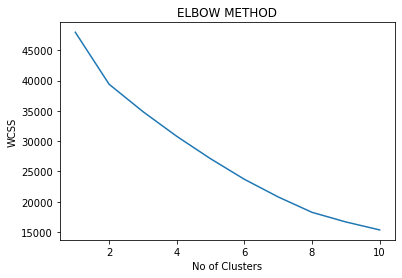

In [45]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

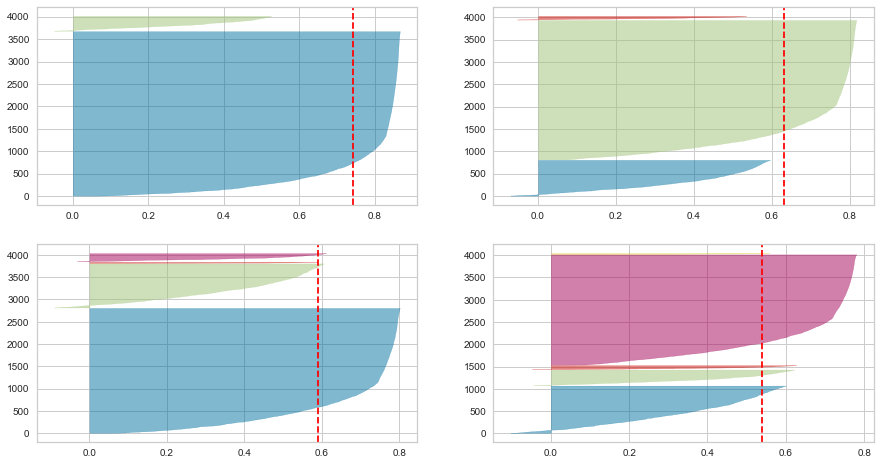

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(airline_data) 

### As we can see in the above graph the silhouette in 6(bottom right) is balanced in comparison of the rest, Thus we can take 5 as the no of clusters for the k means clustering.

In [50]:
k_clusters = KMeans(n_clusters=5,random_state=12)
k_clusters.fit(scaled_airline_df)

KMeans(n_clusters=5, random_state=12)

In [51]:
k_clusters.labels_

array([0, 0, 0, ..., 0, 3, 3])

In [52]:
airline_data['Clusters'] = k_clusters.labels_
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2


### Centeroid Value of the clusters

In [53]:
k_clusters.cluster_centers_

array([[-0.2038084 , -0.05088161, -0.44207714,  0.06403911, -0.06031209,
        -0.42019237, -0.3328818 , -0.15576128, -0.16723046,  0.28539993,
         0.04276128, -0.72887663],
       [ 1.24304152,  1.03124584,  0.15663944,  0.17452088, -0.06276658,
         0.68891062,  1.76078874,  3.62189019,  3.98564268,  0.3261799 ,
         0.99815692, -0.16177019],
       [ 0.60507414, -0.01993413,  1.47328259, -0.08354859, -0.05165482,
         1.25281277,  0.84756966, -0.06073017, -0.06561676,  0.39133995,
         0.42347534,  0.45913601],
       [-0.39629443, -0.03368033, -0.57436091, -0.09824189, -0.06276658,
        -0.51875903, -0.45376712, -0.19260778, -0.22427068, -1.22111861,
        -0.7669193 ,  1.34825731],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735,  0.55235701]])

In [54]:
airline_data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,53052.123504,104.653901,1.452370,1.023935,1.000479,7010.910005,8.417425,243.610340,0.741503,4708.213021,0.391096
1,1,198854.000000,941.852349,2.275168,1.040268,1.000000,33780.624161,28.510067,5530.825503,16.489933,4792.080537,0.852349
2,2,134776.804348,128.973913,4.090217,1.002174,1.002174,47456.357609,19.738043,371.629348,1.120652,4926.335870,0.575000
3,3,33669.486683,118.060533,1.268765,1.000000,1.000000,4617.880145,7.244552,190.398305,0.523002,1597.100484,0.000000
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


### Inferences:
#### 1) Average Balance of people in cluster 0 is 53052.
#### 2) Average Balance of people in cluster 1 is 198854.
#### 3) Average Balance of people in cluster 2 is 134776.
#### 4) Average Balance of people in cluster 3 is 33669.
#### 5) Average Balance of people in cluster 4 is 138061.

## 3. DBSCAN Clustering

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
db = DBSCAN(min_samples=5,eps=2)
class_pr = db.fit_predict(scaled_airline_df)

In [58]:
class_pr

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [59]:
airline_data['Clusters'] = class_pr
airline_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [60]:
airline_data.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,255513.762431,1642.701657,2.900552,1.093923,1.270718,54023.751381,26.707182,3797.165746,10.464088,4923.994475,0.773481
1,0,57966.383892,43.485691,1.698692,1.000000,1.000000,9826.995503,8.928455,190.846280,0.562960,3817.123876,0.000000
2,1,102161.050000,68.830435,4.363043,1.000000,1.000000,53061.234783,20.230435,468.945652,1.545652,5029.382609,1.000000
3,2,65953.790564,119.718067,1.733026,1.000000,1.000000,11411.507480,11.284235,511.980437,1.569620,4330.162255,1.000000
4,3,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000
5,4,51096.000000,0.000000,1.000000,3.000000,1.000000,15561.666667,14.333333,44.444444,0.222222,3603.444444,0.000000
6,5,40618.000000,0.000000,1.000000,2.000000,1.000000,8444.142857,14.285714,250.000000,0.714286,4612.285714,1.000000
7,6,73323.400000,117.800000,1.000000,1.000000,1.000000,12311.200000,30.000000,3734.600000,24.800000,4324.800000,1.000000
8,7,41952.166667,6055.500000,1.000000,1.000000,1.000000,2432.333333,2.666667,144.500000,0.500000,3874.000000,0.000000


# ===================== THE END ==========================